In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc
from sklearn import tree
from IPython.display import display

root_dir = r'./'

import module.model_pipline_util as model_util
import module.decision_tree_util as dt_util

RANDOM_STATE = 1234
POS_RATIO = .5
FUZZY_NEARLY_ONE = .99
PIVOT_THRESHOLD = 0.5

# on Wisconsin Breast Cancer (Original) Data Set

In [2]:
dataset_path = root_dir + 'datasets/breast-cancer-wisconsin.data'
model_name = 'decision_tree_d2_original'

data = pd.read_csv(dataset_path, header=None, dtype={0:str})
data.columns = ['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 
                'marginal_adhesion','single_epithelial_cell_size', 'bare_nuclei', 
                'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

data = data[data['bare_nuclei'] != '?']
data['bare_nuclei'] = data['bare_nuclei'].astype(int)
data['class'] = data['class'].map({2:0, 4:1})

features = data.loc[:, ~data.columns.isin(['class', 'id'])].columns
x_train, x_test, y_train, y_test = train_test_split(data[features], data['class'], 
                                                    test_size=0.3, 
                                                    random_state=RANDOM_STATE)
x_train = x_train.values
x_test = x_test.values

print('# of trainset', x_train.shape[0], 'Positive sample', y_train.sum())
print('# of testset', x_test.shape[0], 'Positive sample', y_test.sum())

# of trainset 478 Positive sample 167
# of testset 205 Positive sample 72


decision_tree_d2_original
           train	test
accuracy   0.9456	0.9317
precision  0.8691	0.8452
recall     0.9940	0.9861
f1         0.9274	0.9103
roc_auc    0.9813	0.9769
training time   0.00200 s
evaluation time 0.00897 s
saving time     0.00100 s


C:\Users\Laika\anaconda3\envs\fuzzy_conviction\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


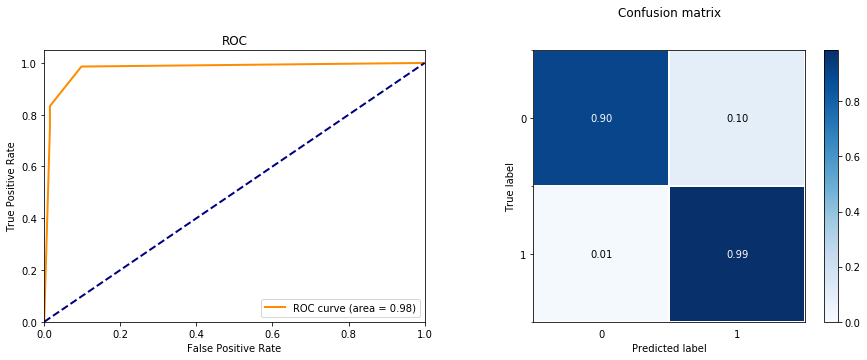

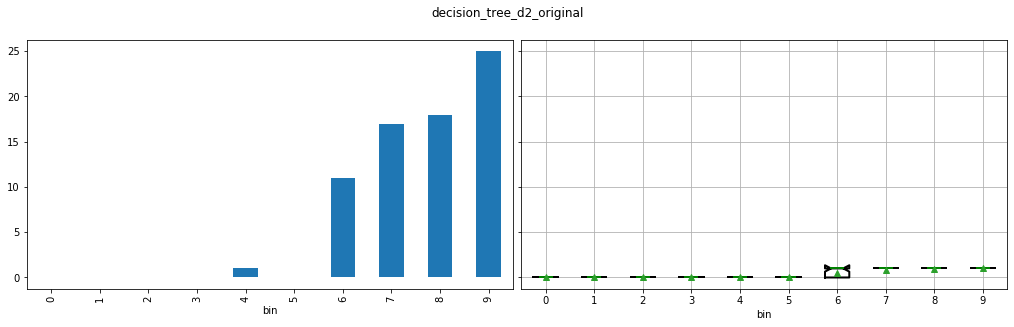

In [3]:
models = {model_name:(DecisionTreeClassifier, {'random_state':RANDOM_STATE, 'max_depth':2})}

model_path = root_dir + 'results/original/'   

model_util.run_experiment(models, model_path, 'classifier', x_train, y_train, x_test=x_test, y_test=y_test)

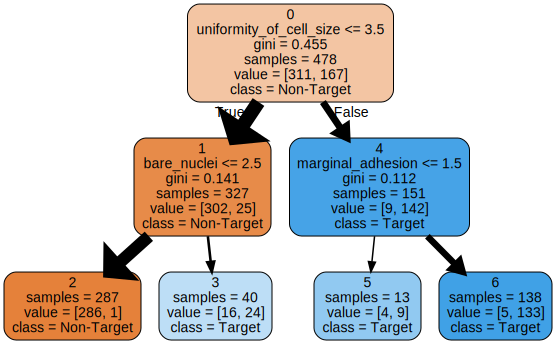

<Figure size 720x1080 with 0 Axes>

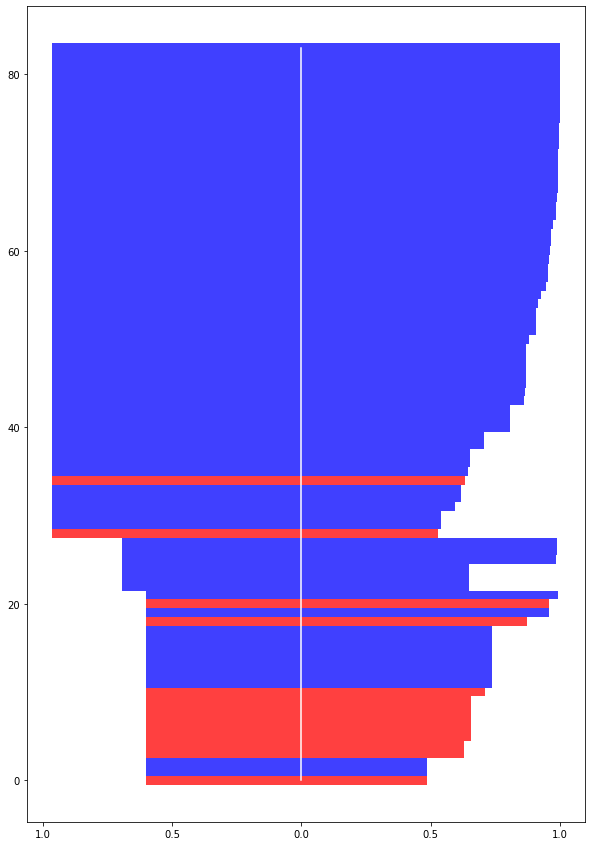

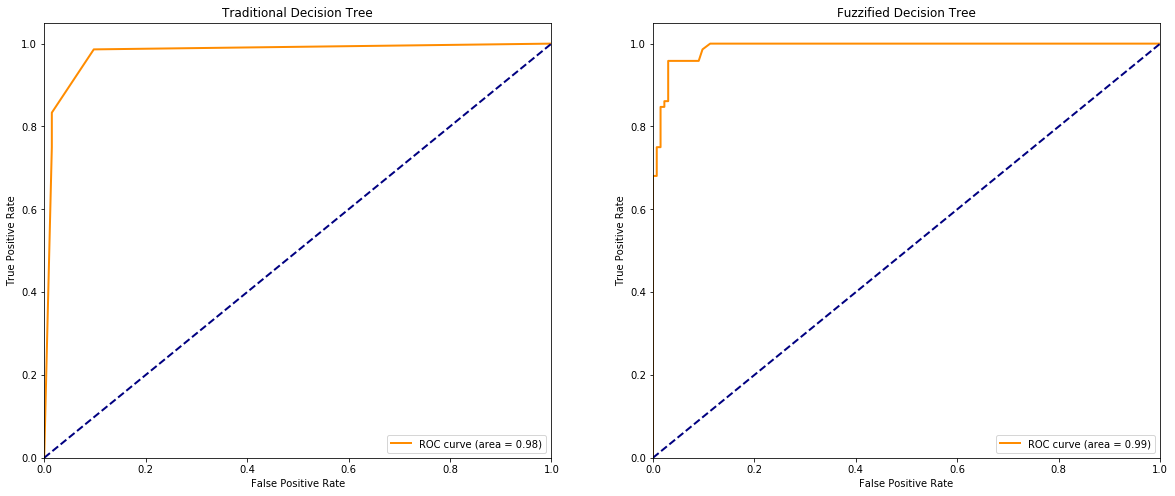

In [4]:
model = model_util.load('{}{}.pkl'.format(model_path, model_name), 'sklearn')
y_pred = model.predict_proba(x_test)[:, 1]

dot_data = tree.export_graphviz(model, class_names=['Non-Target', 'Target'], filled=True, \
                                  rounded=True, out_file=None, feature_names=features)

graph = dt_util.render_tree(dot_data, model_name, model_path)
display(graph)

df_temp = dt_util.cal_conviction_rate(model, x_train, x_test, y_test, features, FUZZY_NEARLY_ONE, PIVOT_THRESHOLD)
dt_util.plot_score_conviction_rate(df_temp[df_temp['prob'] > .5], model_path+'score_{}.png'.format(model_name))

fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
fpr, tpr, _ = model_util.cal_roc_curve(df_temp, 'Target', ['prob'])
model_util.show_roc_curve_from_fpr_tpr(fpr, tpr, ax=axs[0], title='Traditional Decision Tree')

fpr, tpr, _ = model_util.cal_roc_curve(df_temp, 'Target', ['prob', 'leaf_fuzzy_value'])
model_util.show_roc_curve_from_fpr_tpr(fpr, tpr, ax=axs[1], title='Fuzzified Decision Tree')

plt.savefig('{}roc_{}.png'.format(model_path, model_name))

# on Wisconsin Breast Cancer (Diagnostic) Data Set

In [5]:
dataset_path = root_dir + 'datasets/wdbc.data'
model_name = 'decision_tree_d2_diagnostic'
data = pd.read_csv(dataset_path, header=None, dtype={0:str})
data.columns = ['id', 'diagnosis'] + ['feature_{}'.format(i) for i in range(1, 31)]
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})

features = data.loc[:, ~data.columns.isin(['diagnosis', 'id'])].columns
x_train, x_test, y_train, y_test = train_test_split(data[features], data['diagnosis'], 
                                                    test_size=0.3, 
                                                    random_state=RANDOM_STATE)
x_train = x_train.values
x_test = x_test.values

print('# of trainset', x_train.shape[0], 'Positive sample', y_train.sum())
print('# of testset', x_test.shape[0], 'Positive sample', y_test.sum())

# of trainset 398 Positive sample 146
# of testset 171 Positive sample 66


decision_tree_d2_diagnostic
           train	test
accuracy   0.9598	0.9240
precision  0.9514	0.9206
recall     0.9384	0.8788
f1         0.9448	0.8992
roc_auc    0.9721	0.9320
training time   0.00200 s
evaluation time 0.00798 s
saving time     0.00100 s


C:\Users\Laika\anaconda3\envs\fuzzy_conviction\lib\site-packages\pandas\core\frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


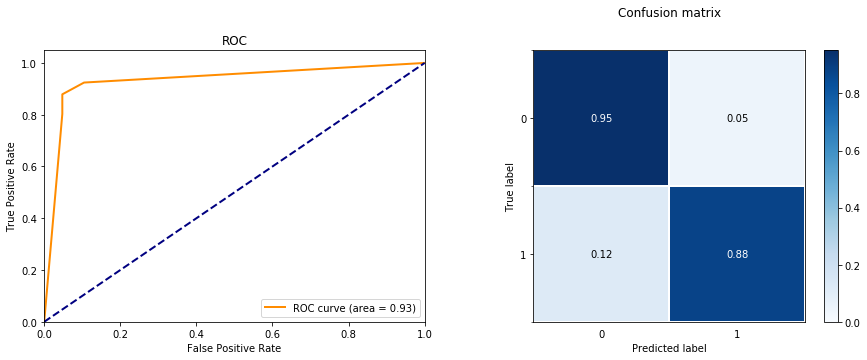

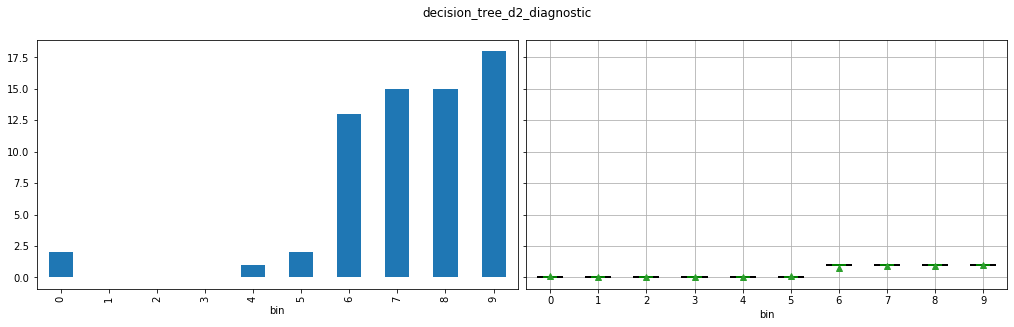

In [6]:
models = {'decision_tree_d2_diagnostic':(DecisionTreeClassifier, {'random_state':RANDOM_STATE, 'max_depth':2})}

model_path = root_dir + 'results/diagnostic/'   

model_util.run_experiment(models, model_path, 'classifier', x_train, y_train, x_test=x_test, y_test=y_test)

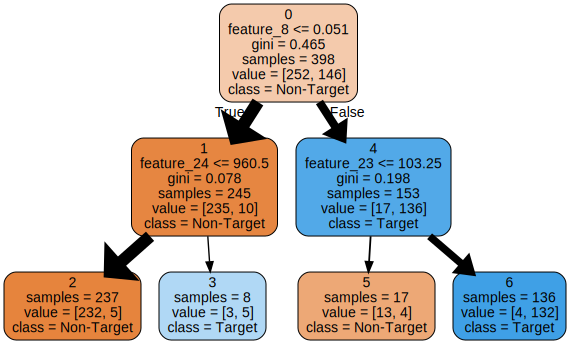

<Figure size 720x1080 with 0 Axes>

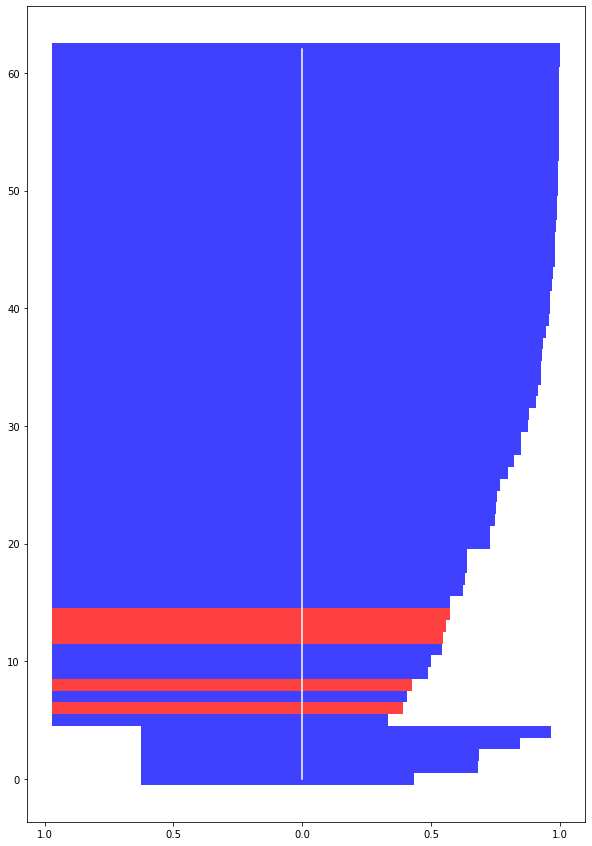

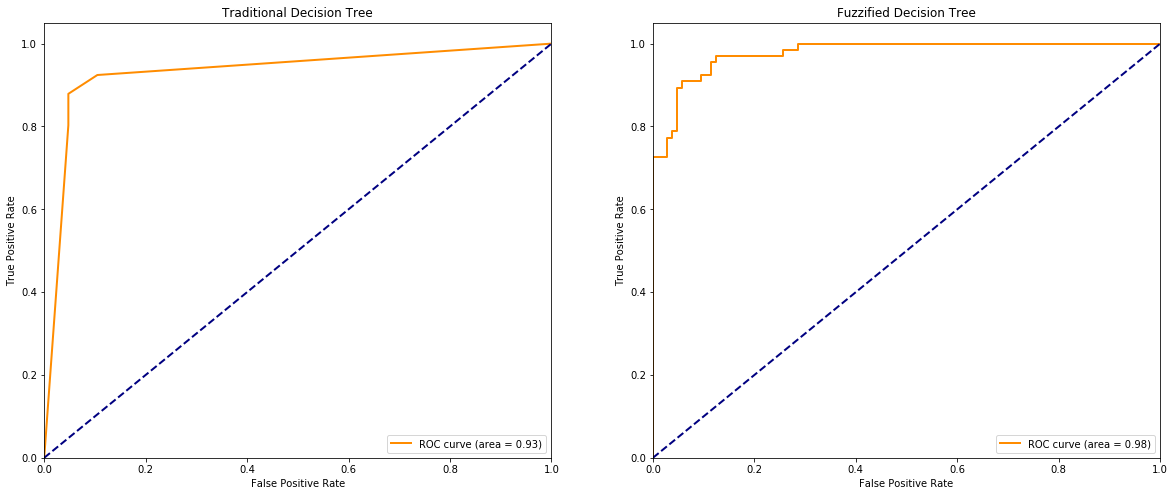

In [7]:
model = model_util.load('{}{}.pkl'.format(model_path, model_name), 'sklearn')
y_pred = model.predict_proba(x_test)[:, 1]

dot_data = tree.export_graphviz(model, class_names=['Non-Target', 'Target'], filled=True, \
                                  rounded=True, out_file=None, feature_names=features)

graph = dt_util.render_tree(dot_data, model_name, model_path)
display(graph)

df_temp = dt_util.cal_conviction_rate(model, x_train, x_test, y_test, features, FUZZY_NEARLY_ONE, PIVOT_THRESHOLD)
dt_util.plot_score_conviction_rate(df_temp[df_temp['prob'] > .5], model_path+'score_{}.png'.format(model_name))

fig, axs = plt.subplots(ncols=2, figsize=(20, 8))
fpr, tpr, _ = model_util.cal_roc_curve(df_temp, 'Target', ['prob'])
model_util.show_roc_curve_from_fpr_tpr(fpr, tpr, ax=axs[0], title='Traditional Decision Tree')

fpr, tpr, _ = model_util.cal_roc_curve(df_temp, 'Target', ['prob', 'leaf_fuzzy_value'])
model_util.show_roc_curve_from_fpr_tpr(fpr, tpr, ax=axs[1], title='Fuzzified Decision Tree')

plt.savefig('{}roc_{}.png'.format(model_path, model_name))